<a href="https://colab.research.google.com/github/Advait177013/ML_CSE4020/blob/main/20BCE1143_LABFAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
url = 'https://raw.githubusercontent.com/Advait177013/ML_CSE4020/main/20BCE1143_labfat.csv'
df = pd.read_csv(url)
df

,Movie Name,Director,Released Year,Movie Type
0,Movie 1,Kevin Feige,2020,Thriller
1,Movie 2,Kevin Feige,2019,Action
2,Movie 3,Kevin Feige,2017,Thriller
3,Movie 4,Kevin Feige,2016,Drama
4,Movie 5,Anthony Russo,2015,Comedy
5,Movie 6,Anthony Russo,2014,Thriller
6,Movie 7,Anthony Russo,2018,Thriller
7,Movie 8,Christopher Nolan,2013,Action
8,Movie 9,Christopher Nolan,2012,Action
9,Movie 10,Christopher Nolan,2014,Drama


In [11]:
#X is input vars, y is output vars
X = df[['Director', 'Released Year']]
y = df[['Movie Type']]
print(df.info())

#converting objects to integers
X = X.apply(lambda col: pd.factorize(col)[0])
y = y.apply(lambda col: pd.factorize(col)[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie Name     15 non-null     object
 1   Director       15 non-null     object
 2   Released Year  15 non-null     int64 
 3   Movie Type     15 non-null     object
dtypes: int64(1), object(3)
memory usage: 608.0+ bytes
None


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Director       15 non-null     int64
 1   Released Year  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Movie Type  15 non-null     int64
dtypes: int64(1)
memory usage: 248.0 bytes


In [23]:
#to predict for movie 11 and movie 12, so we have to manually set train test
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14]
X_test = X.iloc[10:12, ]
X_train = X.iloc[idx]
y_test = y.iloc[10:12, ]
y_train = y.iloc[idx]

In [61]:
#our data is pretty wild because we converted it from string to int, and the other is relatively compacted to the 2000s range, so scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

With Linear Regression

In [62]:
mymlr = LinearRegression()
mymlr.fit(X_train_scaled, y_train)
y_pred_mlr = mymlr.predict(X_test_scaled)

In [63]:
mlr_mse = mean_squared_error(y_test, y_pred_mlr)
mlr_mae = mean_absolute_error(y_test, y_pred_mlr)

print("\nLinear Regression \nmse = ",mlr_mse," \nmae = ",mlr_mae,"\nrmse = ", sqrt(mlr_mse))


Linear Regression 
mse =  2.074003910689363  
mae =  1.1863478940900456 
rmse =  1.440140239938237


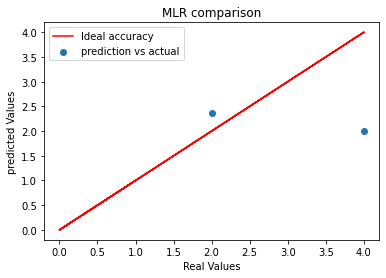

In [64]:
plt.scatter(y_test, y_pred_mlr, label="prediction vs actual")
plt.xlabel("Real Values")
plt.ylabel("predicted Values")
plt.plot(y, y, '-r', label="Ideal accuracy")
plt.legend()
plt.title("MLR comparison")
plt.show()

With Logistic Regression

In [65]:
mylogReg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred_logreg = mylogReg.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
logreg_mse = mean_squared_error(y_test, y_pred_logreg)
logreg_mae = mean_absolute_error(y_test, y_pred_logreg)

print("\nLinear Regression \nmse = ",logreg_mse," \nmae = ",logreg_mae,"\nrmse = ", sqrt(logreg_mse))


Linear Regression 
mse =  2.5  
mae =  1.5 
rmse =  1.5811388300841898


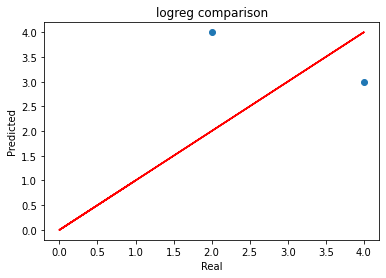

In [67]:
plt.scatter(y_test, y_pred_logreg, label="Real Comparison")
plt.plot(y, y, '-r', label="Ideal Accuracy")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("logreg comparison")
plt.show()

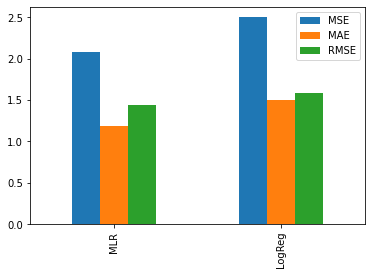

In [68]:
#plotting accuracy metrics
mse_data = [mlr_mse, logreg_mse]
mae_data = [mlr_mae, logreg_mae]
rmse_data = [sqrt(mlr_mse), sqrt(logreg_mse)]

index = ['MLR', 'LogReg']
df_metrics = pd.DataFrame({'MSE': mse_data, 'MAE': mae_data,'RMSE': rmse_data}, index=index)
df_metrics.plot.bar()

As we can see, LogReg is on average showing worse accuracy than Linear Regression